### **Objective 1.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score, precision_score, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#### Question 1.

In [ ]:
# save the data from the csv file into a Pandas DataFrame - mouse_train
mouse_train = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv')

#### Question 2.

##### (a)

In [ ]:
# display first 5 rows of the dataset
mouse_train.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S


In [ ]:
# display the columns of the dataset
mouse_train.columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'Genotype', 'Treatment_Behavior'],
      dtype='object')

In [ ]:
# display range of rows, i.e., index range
mouse_train.index

RangeIndex(start=0, stop=762, step=1)

From the above observations, the data consists of some numerical value for 77 proteins, the Genotype, and the Treatment Behaviour, for 762 mice.

A variable (protein data) will not be usable if it contains NaN values. We can find out which columns (each representing a variable) contain NaN values:

In [ ]:
mouse_train.columns[mouse_train.isna().any()].tolist()
# code from https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

['ELK_N',
 'MEK_N',
 'Bcatenin_N',
 'BAD_N',
 'BCL2_N',
 'pCFOS_N',
 'H3AcK18_N',
 'EGR1_N',
 'H3MeK4_N']

The above printed variables are unusable as given as they contain NaN values. A way around it is to impute missing values, if the missing values account for less than 10% of the data for the variable (protein) in question.

In [ ]:
list_with_NaN = mouse_train.columns[mouse_train.isna().any()].tolist()
mouse_train[list_with_NaN].isna().sum()
# outputs the number of NaN values in each of the columns with NaN values
# code inspired by https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe

ELK_N          15
MEK_N           4
Bcatenin_N     15
BAD_N         180
BCL2_N        195
pCFOS_N        60
H3AcK18_N     150
EGR1_N        180
H3MeK4_N      180
dtype: int64

Based on the above observation, we can drop the variables with NaN values greater than 60 (~10% of the total number of mice, i.e., 762)

In [ ]:
# deletes the columns in mouse_train dataframe that have more than 60 NaN values (columns input manually)
mouse_train = mouse_train.drop(['BAD_N', 'BCL2_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N'], axis=1)

# inspired by https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

Another thing we need to check to make sure that a variable is usable or not is to check its variance, i.e., if the value of the variable is actually varying for it to be useful for our training.

In [ ]:
# create dataframe consisting only of numerical values (including NaN), i.e., exclude Genotype and Treatment Behavior columns
mt_num_only = mouse_train.drop(['Genotype', 'Treatment_Behavior'], axis=1)

# display the variance of values in each column
mt_num_only.var()

DYRK1A_N    0.075721
ITSN1_N     0.075600
BDNF_N      0.002166
NR1_N       0.117596
NR2A_N      0.863416
              ...   
SHH_N       0.000874
pS6_N       0.000223
pCFOS_N     0.000521
SYP_N       0.003882
CaNA_N      0.113641
Length: 72, dtype: float64

In [ ]:
# reduce the dataframe to only contain variables with variance greater than 0.0005
mt_num_only = mt_num_only.loc[:, mt_num_only.var(numeric_only = True) > 0.0005]

# display mt_num_only
mt_num_only

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pCFOS_N,SYP_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.108336,0.427099,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.104315,0.441581,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.106219,0.435777,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.111262,0.391691,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.110694,0.434154,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.311337,1.622850,2.236925,0.149263,1.136276,1.001404,0.216128,0.115567,0.441207,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.315762,1.657617,2.274556,0.154894,1.154191,1.043402,0.209717,0.108944,0.444913,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.308615,1.504094,2.107139,0.153154,1.195479,0.948795,0.211279,0.114635,0.422789,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.327140,1.568203,2.212959,0.154868,1.213194,0.995884,0.197436,0.120649,0.459901,1.543274


##### (b)

In [ ]:
# display correlation matrix for the columns (variables) of the dataframe mt_num_only
mt_num_only.corr()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pCFOS_N,SYP_N,CaNA_N
DYRK1A_N,1.000000,0.961321,0.407110,0.314795,0.340011,-0.182126,-0.085401,-0.158167,0.082463,0.811398,...,-0.174372,-0.243189,-0.162544,-0.401000,-0.428442,0.339879,-0.223812,-0.224427,-0.035929,0.457907
ITSN1_N,0.961321,1.000000,0.495102,0.428745,0.421034,-0.149509,-0.068712,-0.114789,0.200468,0.796880,...,-0.102749,-0.138549,-0.089496,-0.430173,-0.370611,0.403635,-0.220720,-0.300170,0.039384,0.495085
BDNF_N,0.407110,0.495102,1.000000,0.817986,0.746004,0.241501,0.332689,0.129602,0.569146,0.458951,...,0.123434,0.055620,0.046813,-0.214369,-0.031408,0.235227,-0.112984,-0.265185,0.454025,0.304098
NR1_N,0.314795,0.428745,0.817986,1.000000,0.866667,0.185322,0.220929,0.253744,0.599846,0.399791,...,0.078904,0.200738,0.324115,-0.247044,0.074819,0.245469,-0.100915,-0.364487,0.486483,0.205033
NR2A_N,0.340011,0.421034,0.746004,0.866667,1.000000,0.076446,0.079740,0.223203,0.362348,0.387644,...,-0.041624,0.129107,0.184531,-0.311324,0.002289,0.117841,-0.237932,-0.426562,0.377628,0.185840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pGSK3B_Tyr216_N,0.339879,0.403635,0.235227,0.245469,0.117841,-0.035002,-0.039725,0.088942,0.166500,0.144792,...,0.405606,0.346149,0.355325,-0.164691,0.058666,1.000000,0.288273,-0.068222,0.345046,0.527547
SHH_N,-0.223812,-0.220720,-0.112984,-0.100915,-0.237932,0.113274,0.107594,0.065394,0.044608,-0.190035,...,0.445384,0.195775,0.233734,0.505187,0.316371,0.288273,1.000000,0.522662,0.115625,-0.166451
pCFOS_N,-0.224427,-0.300170,-0.265185,-0.364487,-0.426562,0.027823,0.107951,-0.087144,-0.235981,-0.155787,...,0.181487,0.057807,-0.095393,0.611258,0.155828,-0.068222,0.522662,1.000000,-0.010451,-0.314474
SYP_N,-0.035929,0.039384,0.454025,0.486483,0.377628,0.199349,0.232262,0.187727,0.383455,0.003932,...,0.454856,0.525524,0.404700,0.140256,0.343885,0.345046,0.115625,-0.010451,1.000000,0.273142


We can see that while most of the columns don't have much correlation, some of them have very high correlation values of around 0.85-0.95. We would like to remove the high correlation variables since they don't improve the dataset.

In [ ]:
# Create correlation matrix
corr_matrix = mt_num_only.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features
mt_num_only.drop(to_drop, axis=1, inplace=True)
mt_num_only

# code from https://stackoverflow.com/a/52509954, with only necessary naming and value changes

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,...,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pCFOS_N,SYP_N,CaNA_N
0,0.503644,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.306382,...,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.108336,0.427099,1.675652
1,0.514617,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.299051,...,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.104315,0.441581,1.743610
2,0.509183,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.291276,...,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.106219,0.435777,1.926427
3,0.442107,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.296729,...,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.111262,0.391691,1.700563
4,0.434940,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.286961,...,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.110694,0.434154,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,0.317851,...,0.311337,1.622850,2.236925,0.149263,1.136276,1.001404,0.216128,0.115567,0.441207,1.474465
758,0.401739,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,0.329786,...,0.315762,1.657617,2.274556,0.154894,1.154191,1.043402,0.209717,0.108944,0.444913,1.516605
759,0.382182,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,0.354545,...,0.308615,1.504094,2.107139,0.153154,1.195479,0.948795,0.211279,0.114635,0.422789,1.433514
760,0.365622,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,0.325819,...,0.327140,1.568203,2.212959,0.154868,1.213194,0.995884,0.197436,0.120649,0.459901,1.543274


In [ ]:
# merge the numeric only columns with Genotype and Treatment Behavior columns
mt_mod = pd.concat([mt_num_only, mouse_train[['Genotype', 'Treatment_Behavior']]], axis=1)
mt_mod

# inspiration from https://pandas.pydata.org/docs/user_guide/merging.html

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,...,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pCFOS_N,SYP_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.306382,...,2.014875,0.108234,1.044979,0.831557,0.188852,0.108336,0.427099,1.675652,Control,Memantine_C/S
1,0.514617,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.299051,...,2.004605,0.109749,1.009883,0.849270,0.200404,0.104315,0.441581,1.743610,Control,Memantine_C/S
2,0.509183,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.291276,...,2.016831,0.108196,0.996848,0.846709,0.193685,0.106219,0.435777,1.926427,Control,Memantine_C/S
3,0.442107,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.296729,...,1.957233,0.119883,0.990225,0.833277,0.192112,0.111262,0.391691,1.700563,Control,Memantine_C/S
4,0.434940,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.286961,...,2.009109,0.119524,0.997775,0.878668,0.205604,0.110694,0.434154,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,0.317851,...,2.236925,0.149263,1.136276,1.001404,0.216128,0.115567,0.441207,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,0.329786,...,2.274556,0.154894,1.154191,1.043402,0.209717,0.108944,0.444913,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,0.354545,...,2.107139,0.153154,1.195479,0.948795,0.211279,0.114635,0.422789,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,0.325819,...,2.212959,0.154868,1.213194,0.995884,0.197436,0.120649,0.459901,1.543274,Ts65Dn,Saline_S/C


##### (c)

In [ ]:
mouse_train['Genotype'].value_counts()

Control    435
Ts65Dn     327
Name: Genotype, dtype: int64

In [ ]:
mouse_train['Treatment_Behavior'].value_counts()

Memantine_C/S    225
Memantine_S/C    225
Saline_C/S       180
Saline_S/C       132
Name: Treatment_Behavior, dtype: int64

As can be seen above, the number of entries for each of the classes in both Genotype and Treatment Behavior columns is balanced. Thus, the classes are balanced.

#### Question 3.

In [ ]:
# display number of NaN values in each variable in mt_num_only
mt_num_only.isna().sum()

DYRK1A_N            0
BDNF_N              0
NR1_N               0
NR2A_N              0
pAKT_N              0
pBRAF_N             0
pCAMKII_N           0
pCREB_N             0
pELK_N              0
pJNK_N              0
PKCA_N              0
pMEK_N              0
pNR2A_N             0
pPKCAB_N            0
pRSK_N              0
AKT_N               0
CAMKII_N            0
CREB_N              0
ELK_N              15
ERK_N               0
GSK3B_N             0
JNK_N               0
MEK_N               4
TRKA_N              0
RSK_N               0
APP_N               0
SOD1_N              0
MTOR_N              0
P38_N               0
pMTOR_N             0
DSCR1_N             0
AMPKA_N             0
NR2B_N              0
pNUMB_N             0
RAPTOR_N            0
TIAM1_N             0
pP70S6_N            0
NUMB_N              0
P70S6_N             0
pPKCG_N             0
CDK5_N              0
S6_N                0
ADARB1_N            0
AcetylH3K9_N        0
RRP1_N              0
nNOS_N    

We have a few variables with missing values. We can impute the missing values by using multivariate imputation from sklearn.

In [ ]:
# Multivariate feature imputation from sklearn to impute missing data
imp = IterativeImputer(max_iter=100, random_state=0)
mt_num_imp = imp.fit_transform(mt_num_only)

# convert the mt_num_imp array to Pandas DataFrame
mt_num_imp = pd.DataFrame(mt_num_imp, columns = mt_num_only.columns.tolist())

In [ ]:
# display number of NaN values in each variable in mt_num_imp
mt_num_imp.isna().sum()

DYRK1A_N           0
BDNF_N             0
NR1_N              0
NR2A_N             0
pAKT_N             0
pBRAF_N            0
pCAMKII_N          0
pCREB_N            0
pELK_N             0
pJNK_N             0
PKCA_N             0
pMEK_N             0
pNR2A_N            0
pPKCAB_N           0
pRSK_N             0
AKT_N              0
CAMKII_N           0
CREB_N             0
ELK_N              0
ERK_N              0
GSK3B_N            0
JNK_N              0
MEK_N              0
TRKA_N             0
RSK_N              0
APP_N              0
SOD1_N             0
MTOR_N             0
P38_N              0
pMTOR_N            0
DSCR1_N            0
AMPKA_N            0
NR2B_N             0
pNUMB_N            0
RAPTOR_N           0
TIAM1_N            0
pP70S6_N           0
NUMB_N             0
P70S6_N            0
pPKCG_N            0
CDK5_N             0
S6_N               0
ADARB1_N           0
AcetylH3K9_N       0
RRP1_N             0
nNOS_N             0
Tau_N              0
GluR3_N      

Successfully imputed missing data. Now we need to normalize this data by using sklearn's StandardScaler.

In [ ]:
# standard scaling of each feature of the data
scaler = StandardScaler()
mt_num_imp = pd.DataFrame(scaler.fit_transform(mt_num_imp), columns = mt_num_imp.columns.tolist())

#### Question 4.

The Treatment Behavior has 4 classes - Memantine Shock-Context, Memantine Context-Shock, Saline Shock-Context, Saline Context-Shock. The source paper (at least what I found to be the most relevant to the dataset provided) is https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0119491.  
It is a test of the behavior of mice after being treated with Memantine (the actual drug treatment), or with Saline (which acts as a Placebo). The purpose of the experiment was to test the efficacy of Memantine on the learning of environment by the mice, under the Context Fear Conditioning (CFC) protocol, i.e., context-shock or shock-context.

For the purpose of the experiment, each class plays an equal role in determining the efficacy of the drug. We would want the model to make accurate predictions for each class.
Thus, a good metric in this case would be Accuracy.

As we want to primarily check the efficacy of the drug on diseased mice, it would be better to have as many correct classifications of 'Ts65Dn' as possible. If we say 'Ts65Dn' is positive, and 'Control' is negative, then we basically want to minimize both _false positives_ and _false negatives_. A metric that can balance both is the F1-Score.

Source of inspiration and information on choosing a good metric for multivariate classification: https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

#### Question 5.

##### (a)

In [ ]:
# define training datasets X, y, and z
X = mt_num_imp

# y is the desired output of binary classification
y = mouse_train['Genotype']
y = y.replace({"Control": 0, "Ts65Dn": 1})

# z is the desired output of multi-class classification
z = mouse_train['Treatment_Behavior']

In [ ]:
# define param_grid to do exhaustive search over
y_params = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# define the Linear SVM Classifiers (binary and multi-class)
svc = SVC(kernel = 'linear', max_iter = 10**8)

# multi-class classification decision function based on one vs. one classification
svc_m = SVC(kernel = 'linear', max_iter = 10**8, decision_function_shape = 'ovo')

# perform grid search cv over binary Linear SVM Classification
clf_1_binary = GridSearchCV(svc, param_grid=y_params, scoring='f1')
clf_1_binary.fit(X, y)

GridSearchCV(estimator=SVC(kernel='linear', max_iter=100000000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}, scoring='f1')

In [ ]:
# display the cv_results_ dictionary for the classification
clf_1_binary.cv_results_

{'mean_fit_time': array([0.01758113, 0.00977607, 0.01458578, 0.08076539, 0.59942689]),
 'std_fit_time': array([0.01172832, 0.00046024, 0.00374791, 0.02929613, 0.24136629]),
 'mean_score_time': array([0.00481086, 0.00388913, 0.003789  , 0.00393734, 0.00395746]),
 'std_score_time': array([2.23023493e-04, 9.96772622e-05, 2.37445629e-04, 2.22784250e-04,
        1.56793701e-04]),
 'param_C': masked_array(data=[0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}],
 'split0_test_score': array([0.85714286, 0.85245902, 0.84552846, 0.84126984, 0.848     ]),
 'split1_test_score': array([0.796875  , 0.77941176, 0.77464789, 0.77142857, 0.77464789]),
 'split2_test_score': array([0.81355932, 0.81666667, 0.74603175, 0.76190476, 0.768     ]),
 'split3_test_score': array([0.7518797 , 0.74074074, 0.64661654, 0.61764706, 0.56296296]),
 'split4_test_score': ar

In [ ]:
clf_1_binary_results = clf_1_binary.cv_results_

# maximum value of mean f1-score among the scores obtained
max_f1 = max(clf_1_binary_results['mean_test_score'])

print(max_f1)

0.7808341475875198


In [ ]:
# indices with the max value of f1-score
max_f1_index = [i for i in range(len(clf_1_binary_results['mean_test_score'])) if clf_1_binary_results['mean_test_score'][i] == max_f1]
print(max_f1_index)

[2]


In [ ]:
# prints the hyperparameter values for which we obtained highest f1-score
for i in max_f1_index:
  print(clf_1_binary_results['params'][i])

{'C': 0.01}


In [ ]:
# define param_grid to do exhaustive search over
z_params = {"C": [0.01, 0.1, 1, 10, 100]}

# perform grid search cv over multi-class Linear SVM Classification
clf_1_mc = GridSearchCV(svc_m, param_grid=z_params, scoring='accuracy')
clf_1_mc.fit(X, z)

GridSearchCV(estimator=SVC(decision_function_shape='ovo', kernel='linear',
                           max_iter=100000000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [ ]:
clf_1_mc_results = clf_1_mc.cv_results_

# maximum value of mean accuracy among the scores obtained
max_accuracy = max(clf_1_mc_results['mean_test_score'])
print(max_accuracy)

0.7559769521843824


In [ ]:
# indices with the max value of accuracy
max_acc_index = [i for i in range(len(clf_1_mc_results['mean_test_score'])) if clf_1_mc_results['mean_test_score'][i] == max_accuracy]

# prints the hyperparameter values for which we obtained highest accuracy
for i in max_acc_index:
  print(clf_1_mc_results['params'][i])

{'C': 0.1}


##### (b)

In [ ]:
# define RBF SVM Classifier
rbf = SVC(kernel = 'rbf', max_iter = 10**8)

# get RBF SVM Classifier params
rbf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 100000000,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

The parameter "gamma" above is equal to $1/2σ^2$, where $\sigma$ is the standard deviation of the gaussian curve formed by the RBF Kernel. $\sigma$ is a measure of the kernel width. Thus, we'll use "gamma" as our hyperparameter in place of kernel width mentioned in the question.

In [ ]:
# define params to do exhaustive search over
y_params = {"C": [1, 10, 100, 1000, 10000, 100000], "gamma": [0.000001, 0.00001, 0.0001, 0.001, 0.01]}

# perform grid search cv over binary RBF SVM Classification
clf_2_binary = GridSearchCV(rbf, param_grid=y_params, scoring='f1')
clf_2_binary.fit(X, y)

GridSearchCV(estimator=SVC(max_iter=100000000),
             param_grid={'C': [1, 10, 100, 1000, 10000, 100000],
                         'gamma': [1e-06, 1e-05, 0.0001, 0.001, 0.01]},
             scoring='f1')

In [ ]:
clf_2_binary_results = clf_2_binary.cv_results_

# maximum value of mean f1-score among the scores obtained
max_f1 = max(clf_2_binary_results['mean_test_score'])
print(max_f1)

0.8074564690418496


In [ ]:
# indices with the max value of f1-score
max_f1_index = [i for i in range(len(clf_2_binary_results['mean_test_score'])) if clf_2_binary_results['mean_test_score'][i] == max_f1]

# prints the hyperparameter values for which we obtained highest f1-score
for i in max_f1_index:
  print(clf_2_binary_results['params'][i])

{'C': 10, 'gamma': 0.001}


In [ ]:
# define params to do exhaustive search over
z_params = {"C": [1, 10, 100, 1000, 10000, 100000], "gamma": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

# perform grid search cv over multi-class RBF SVM Classification
clf_2_mc = GridSearchCV(rbf, param_grid=z_params, scoring='accuracy')
clf_2_mc.fit(X, z)

GridSearchCV(estimator=SVC(max_iter=100000000),
             param_grid={'C': [1, 10, 100, 1000, 10000, 100000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [ ]:
clf_2_mc_results = clf_2_mc.cv_results_

# maximum value of mean accuracy among the scores obtained
max_accuracy = max(clf_2_mc_results['mean_test_score'])
print(max_accuracy)

0.7638114895080839


In [ ]:
# indices with the max value of accuracy
max_acc_index = [i for i in range(len(clf_2_mc_results['mean_test_score'])) if clf_2_mc_results['mean_test_score'][i] == max_accuracy]

# prints the hyperparameter values for which we obtained highest accuracy
for i in max_acc_index:
  print(clf_2_mc_results['params'][i])

{'C': 1000, 'gamma': 0.0001}


##### (c)

In [ ]:
# define Neural Network classifer with SGD solver and ReLU activation function
nnet = MLPClassifier(solver='sgd', activation = 'relu', learning_rate='constant', max_iter = 10000)

# define params to do exhaustive search over
y_params = {"hidden_layer_sizes": [(5,), (10,), (20,), (35,), (50,), (75,), (100,), (150,), (200,), (250,)],
            "learning_rate_init": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# perform grid search cv over binary Neural Network Classification
clf_3_binary = GridSearchCV(nnet, param_grid=y_params, scoring='f1')
clf_3_binary.fit(X, y)

GridSearchCV(estimator=MLPClassifier(max_iter=10000, solver='sgd'),
             param_grid={'hidden_layer_sizes': [(5,), (10,), (20,), (35,),
                                                (50,), (75,), (100,), (150,),
                                                (200,), (250,)],
                         'learning_rate_init': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                                1, 10]},
             scoring='f1')

In [ ]:
clf_3_binary_results = clf_3_binary.cv_results_

# maximum value of mean f1-score among the scores obtained
max_f1 = max(clf_3_binary_results['mean_test_score'])

print(max_f1)

0.7505813880435596


In [ ]:
# indices with the max value of f1-score
max_f1_index = [i for i in range(len(clf_3_binary_results['mean_test_score'])) if clf_3_binary_results['mean_test_score'][i] == max_f1]

# prints the hyperparameter values for which we obtained highest f1-score

for i in max_f1_index:
  print(clf_3_binary_results['params'][i])

{'hidden_layer_sizes': (35,), 'learning_rate_init': 0.1}


In [ ]:
# define params to do exhaustive search over
z_params = {"hidden_layer_sizes": [(5,), (10,), (20,), (35,), (50,), (75,), (100,), (150,), (200,), (250,)],
            "learning_rate_init": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# perform grid search cv over multi-class Neural Network Classification
clf_3_mc = GridSearchCV(nnet, param_grid=z_params, scoring='accuracy')
clf_3_mc.fit(X, z)

GridSearchCV(estimator=MLPClassifier(max_iter=10000, solver='sgd'),
             param_grid={'hidden_layer_sizes': [(5,), (10,), (20,), (35,),
                                                (50,), (75,), (100,), (150,),
                                                (200,), (250,)],
                         'learning_rate_init': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                                1, 10]},
             scoring='accuracy')

In [ ]:
clf_3_mc_results = clf_3_mc.cv_results_

# maximum value of mean accuracy among the scores obtained
max_accuracy = max(clf_3_mc_results['mean_test_score'])
print(max_accuracy)

0.7323357413140694


In [ ]:
# indices with the max value of accuracy
max_acc_index = [i for i in range(len(clf_3_mc_results['mean_test_score'])) if clf_3_mc_results['mean_test_score'][i] == max_accuracy]

# prints the hyperparameter values for which we obtained highest accuracy
for i in max_acc_index:
  print(clf_3_mc_results['params'][i])

{'hidden_layer_sizes': (5,), 'learning_rate_init': 0.1}


##### (d)

In [ ]:
# define Random Forest Classifier
rndf = RandomForestClassifier()

# define params to do grid search over binary RNDForest Classification
y_params = {"max_depth": [2, 4, 6, 8, 10, 25, 50], "max_features": [3*i for i in range(1, 21)]}

# perform grid search cv
clf_4_binary = GridSearchCV(rndf, param_grid=y_params, scoring='f1')
clf_4_binary.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 25, 50],
                         'max_features': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30,
                                          33, 36, 39, 42, 45, 48, 51, 54, 57,
                                          60]},
             scoring='f1')

In [ ]:
clf_4_binary_results = clf_4_binary.cv_results_

# maximum value of mean f1-score among the scores obtained
max_f1 = max(clf_4_binary_results['mean_test_score'])
print(max_f1)

0.6622847485434988


In [ ]:
# indices with the max value of f1-score
max_f1_index = [i for i in range(len(clf_4_binary_results['mean_test_score'])) if clf_4_binary_results['mean_test_score'][i] == max_f1]

# prints the hyperparameter values for which we obtained highest f1-score
for i in max_f1_index:
  print(clf_4_binary_results['params'][i])

{'max_depth': 2, 'max_features': 51}


In [ ]:
# define params to do grid search over for multi-class RNDForest Classification
z_params = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 25, 50], "max_features": [4*i for i in range(1, 16)]}

# perform grid search cv
clf_4_mc = GridSearchCV(rndf, param_grid=z_params, scoring='accuracy')
clf_4_mc.fit(X, z)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 25, 50],
                         'max_features': [4, 8, 12, 16, 20, 24, 28, 32, 36, 40,
                                          44, 48, 52, 56, 60]},
             scoring='accuracy')

In [ ]:
clf_4_mc_results = clf_4_mc.cv_results_

# maximum value of mean accuracy among the scores obtained
max_accuracy = max(clf_4_mc_results['mean_test_score'])
print(max_accuracy)

0.6759115927072583


In [ ]:
# indices with the max value of accuracy
max_acc_index = [i for i in range(len(clf_4_mc_results['mean_test_score'])) if clf_4_mc_results['mean_test_score'][i] == max_accuracy]

# prints the hyperparameter values for which we obtained highest accuracy
for i in max_acc_index:
  print(clf_4_mc_results['params'][i])

{'max_depth': 9, 'max_features': 4}


#### Question 6.

We'll use **permutation_importance** function from **sklearn.inspection** to check feature importance. We'll use the hyperparameters that gave the best scores in GridSearchCV.

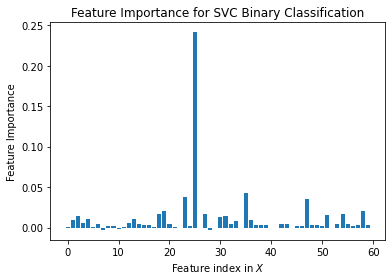

In [ ]:
# define Linear SVM for Binary Classification and fit model
svc_binary = SVC(kernel = 'linear', C = 0.01, max_iter = 10**8)
svc_binary.fit(X, y)

# perform permutation importance over the model to check for feature importance
svc_bin_result = permutation_importance(svc_binary, X, y, scoring = 'f1', n_repeats = 10)

# plot feature importance for each feature (indexed by column number)
plt.bar([x for x in range(len(svc_bin_result.importances_mean))], svc_bin_result.importances_mean)
plt.xlabel('Feature index in $X$')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for SVC Binary Classification')
plt.show()

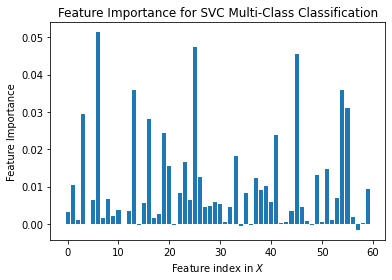

In [ ]:
# define Linear SVM for Multi-Class Classification and fit model
svc_mc = SVC(kernel = 'linear', C = 0.1, max_iter = 10**8)
svc_mc.fit(X, z)

# perform permutation importance over the model to check for feature importance
svc_mc_result = permutation_importance(svc_mc, X, z, scoring = 'accuracy', n_repeats = 10)

# plot feature importance for each feature (indexed by column number)
plt.bar([x for x in range(len(svc_mc_result.importances_mean))], svc_mc_result.importances_mean)
plt.xlabel('Feature index in $X$')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for SVC Multi-Class Classification')
plt.show()

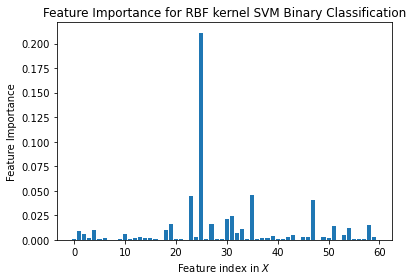

In [ ]:
# define RBF Kernel SVM for Binary Classification and fit model
rbf_binary = SVC(kernel = 'rbf', C = 10, gamma = 0.001, max_iter = 10**8)
rbf_binary.fit(X, y)

# perform permutation importance over the model to check for feature importance
rbf_bin_result = permutation_importance(rbf_binary, X, y, scoring = 'f1', n_repeats = 10)

# plot feature importance for each feature (indexed by column number)
plt.bar([x for x in range(len(rbf_bin_result.importances_mean))], rbf_bin_result.importances_mean)
plt.xlabel('Feature index in $X$')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for RBF kernel SVM Binary Classification')
plt.show()

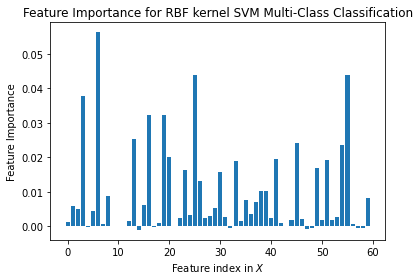

In [ ]:
# define RBF Kernel SVM for Multi-Class Classification and fit model
rbf_mc = SVC(kernel = 'rbf', C = 1000, gamma = 0.0001, max_iter = 10**8)
rbf_mc.fit(X, z)

# perform permutation importance over the model to check for feature importance
rbf_mc_result = permutation_importance(rbf_mc, X, z, scoring = 'accuracy', n_repeats = 10)

# plot feature importance for each feature (indexed by column number)
plt.bar([x for x in range(len(rbf_mc_result.importances_mean))], rbf_mc_result.importances_mean)
plt.xlabel('Feature index in $X$')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for RBF kernel SVM Multi-Class Classification')
plt.show()

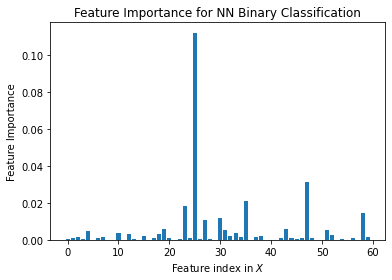

In [ ]:
# define NN for Binary Classification and fit model
nnet_binary = MLPClassifier(solver='sgd', activation = 'relu', 
                         learning_rate='constant', max_iter = 10000,
                         hidden_layer_sizes = (35,), learning_rate_init = 0.1)
nnet_binary.fit(X, y)

# perform permutation importance over the model to check for feature importance
nnet_bin_result = permutation_importance(nnet_binary, X, y, scoring = 'f1', n_repeats = 10)

# plot feature importance for each feature (indexed by column number)
plt.bar([x for x in range(len(nnet_bin_result.importances_mean))], nnet_bin_result.importances_mean)
plt.xlabel('Feature index in $X$')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for NN Binary Classification')
plt.show()

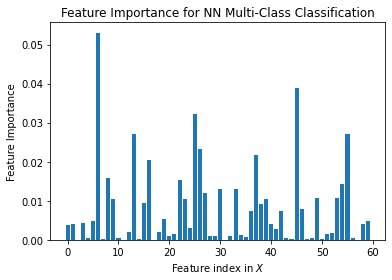

In [ ]:
# define NN for Multi-Class Classification and fit model
nnet_mc = MLPClassifier(solver='sgd', activation = 'relu', 
                         learning_rate='constant', max_iter = 10000,
                         hidden_layer_sizes = (5,), learning_rate_init = 0.1)
nnet_mc.fit(X, z)

# perform permutation importance over the model to check for feature importance
nnet_mc_result = permutation_importance(nnet_mc, X, z, scoring = 'accuracy', n_repeats = 10)

# plot feature importance for each feature (indexed by column number)
plt.bar([x for x in range(len(nnet_mc_result.importances_mean))], nnet_mc_result.importances_mean)
plt.xlabel('Feature index in $X$')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for NN Multi-Class Classification')
plt.show()

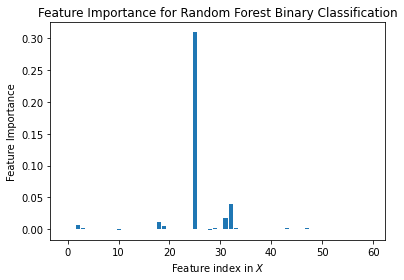

In [ ]:
# define Random Forest Classifer for Binary Classification and fit model
rndf_binary = RandomForestClassifier(max_depth = 2, max_features = 51)
rndf_binary.fit(X, y)

# perform permutation importance over the model to check for feature importance
rndf_bin_result = permutation_importance(rndf_binary, X, y, scoring = 'f1', n_repeats = 10)

# plot feature importance for each feature (indexed by column number)
plt.bar([x for x in range(len(rndf_bin_result.importances_mean))], rndf_bin_result.importances_mean)
plt.xlabel('Feature index in $X$')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Random Forest Binary Classification')
plt.show()

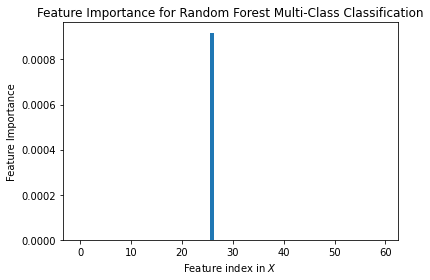

In [ ]:
# define Random Forest Classifer for Multi-Class Classification and fit model
rndf_mc = RandomForestClassifier(max_depth = 9, max_features = 4)
rndf_mc.fit(X, z)

# perform permutation importance over the model to check for feature importance
rndf_mc_result = permutation_importance(rndf_mc, X, z, scoring = 'accuracy', n_repeats = 10)

# plot feature importance for each feature (indexed by column number)
plt.bar([x for x in range(len(rndf_mc_result.importances_mean))], rndf_mc_result.importances_mean)
plt.xlabel('Feature index in $X$')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Random Forest Multi-Class Classification')
plt.show()

#### Question 7.

The RFECV function works only for the Linear SVM and Random Forest Classifier models. It does not work for RBF Kernel SVM and Neural Network Classifier models.

RFECV on dataset $X$ for the Linear SVM Binary Classification model.

In [ ]:
# perform RFECV on Linear SVM Binary Classification
svc_bin_rfe = RFECV(estimator = svc_binary, scoring = 'f1', min_features_to_select = 25)
svc_bin_rfe.fit(X, y)

RFECV(estimator=SVC(C=0.01, kernel='linear', max_iter=100000000),
      min_features_to_select=25, scoring='f1')

In [ ]:
# print best mean f1-score obtained RFECV
print(max(svc_bin_rfe.cv_results_["mean_test_score"]))

0.7965919138513851


RFECV on X for the Linear SVM Multi-Class Classification Model.

In [ ]:
# perform RFECV on Linear SVM Multi-Class Classification
svc_mc_rfe = RFECV(estimator = svc_mc, scoring = 'accuracy', min_features_to_select = 25)
svc_mc_rfe.fit(X, z)

RFECV(estimator=SVC(C=0.1, kernel='linear', max_iter=100000000),
      min_features_to_select=25, scoring='accuracy')

In [ ]:
# print best mean accuracy obtained in RFECV
print(max(svc_mc_rfe.cv_results_["mean_test_score"]))

0.7835483316133471


RFECV on X for the Random Forest Classification Model.

In [ ]:
# perform RFECV on Random Forest Classifier Binary Classification
rndf_bin_rfe = RFECV(estimator = rndf_binary, scoring = 'f1', min_features_to_select = 20)
rndf_bin_rfe.fit(X, y)

RFECV(estimator=RandomForestClassifier(max_depth=2, max_features=51),
      min_features_to_select=20, scoring='f1')

In [ ]:
# print best mean f1-score obtained in RFECV
print(max(rndf_bin_rfe.cv_results_["mean_test_score"]))

0.6825542547171868


In [ ]:
# perform RFECV on Random Forest Classifier Multi-Class Classification
rndf_mc_rfe = RFECV(estimator = rndf_mc, scoring = 'accuracy', min_features_to_select = 20)
rndf_mc_rfe.fit(X, z)

RFECV(estimator=RandomForestClassifier(max_depth=9, max_features=4),
      min_features_to_select=20, scoring='accuracy')

In [ ]:
# print best mean accuracy obtained in RFECV
print(max(rndf_mc_rfe.cv_results_["mean_test_score"]))

0.690325077399381


#### Question 8.

We obtained $<0.7$ scores for both Binary and Multi-Class Classifications using the Random Forest Classifier model even after RFECV. So, it's not worth testing over. Whereas with Linear SVM we got $0.78-0.79$ -ish scores for both Binary and Multi-Class Classification after RFECV, we can go ahead with testing this model on test data. Also, the RBF Kernel SVM gave amazing F1-Score of about $0.81$ for the Binary Classification. We'll go ahead and test this model's performance on test data as well. The Neural Network model performed okayish compared to these above three models, so, we'll not test it with test data.

In [ ]:
# read test data into a pandas dataframe
mouse_test = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv')

# define X_test (features of test data)
X_test = mouse_test[X.columns.tolist()]

# define y_test_bin for binary classification
y_test_bin = mouse_test["Genotype"]
y_test_bin = y_test_bin.replace({"Control": 0, "Ts65Dn": 1})

# define y_test_mc for multi-class classification
y_test_mc = mouse_test["Treatment_Behavior"]

In [ ]:
# check if there are any columns in X_test with NaN values
X_test.isna().any().sum()

0

Since there are no NaN values in X_test, we'll skip the imputing part as it's not required.

In [ ]:
# scale the data to have mean 0 and variance 1
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns.tolist())

In [ ]:
# predict y values for binary and multi-class classifications of Linear SVM model (post RFECV)
y_pred_bin = svc_bin_rfe.predict(X_test)
y_pred_mc = svc_mc_rfe.predict(X_test)

# display classification reports for both classifications
print(classification_report(y_test_bin, y_pred_bin))
print(classification_report(y_test_mc, y_pred_mc))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       135
           1       0.72      0.84      0.78        90

    accuracy                           0.81       225
   macro avg       0.80      0.81      0.81       225
weighted avg       0.82      0.81      0.81       225

               precision    recall  f1-score   support

Memantine_C/S       0.65      0.87      0.74        60
Memantine_S/C       0.94      1.00      0.97        60
   Saline_C/S       0.80      0.53      0.64        60
   Saline_S/C       1.00      0.91      0.95        45

     accuracy                           0.82       225
    macro avg       0.85      0.83      0.83       225
 weighted avg       0.84      0.82      0.82       225



We obtained an F1-Score of 0.78 for 'Ts65Dn' class, which is decent enough. And we obtained an accuracy of 0.82 for the multi-class classification, which is also good.

In [ ]:
# predict y values for binary classification of RBF Kernel SVM model
y_pred_bin = rbf_binary.predict(X_test)

# display the classification report
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       135
           1       0.68      0.86      0.75        90

    accuracy                           0.78       225
   macro avg       0.78      0.79      0.78       225
weighted avg       0.80      0.78      0.78       225



We obtained an F1-Score of 0.75 for 'Ts65Dn' class on test data for the Binary CLassification by RBF Kernel SVM. That's a pretty good score too, just a little less than the score obtained from Linear SVM.

### **Objective 2.**

#### Question 9.  
Implementing the PyTorch tutorial https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html as is and checking its working, except for Fine Tuning ConvNet section.

In [ ]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import torchvision
from torchvision import datasets, models, transforms
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'drive/MyDrive/Colab Notebooks/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=2)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

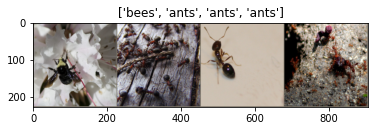

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5338 Acc: 0.7213
val Loss: 0.2309 Acc: 0.9281

Epoch 1/24
----------
train Loss: 0.5521 Acc: 0.7336
val Loss: 0.3090 Acc: 0.8758

Epoch 2/24
----------
train Loss: 0.4710 Acc: 0.7664
val Loss: 0.2001 Acc: 0.9477

Epoch 3/24
----------
train Loss: 0.4349 Acc: 0.8279
val Loss: 0.1868 Acc: 0.9281

Epoch 4/24
----------
train Loss: 0.4760 Acc: 0.7623
val Loss: 0.1911 Acc: 0.9477

Epoch 5/24
----------
train Loss: 0.3585 Acc: 0.8484
val Loss: 0.1890 Acc: 0.9542

Epoch 6/24
----------
train Loss: 0.3629 Acc: 0.8443
val Loss: 0.2710 Acc: 0.8889

Epoch 7/24
----------
train Loss: 0.3830 Acc: 0.8402
val Loss: 0.1849 Acc: 0.9477

Epoch 8/24
----------
train Loss: 0.3892 Acc: 0.8238
val Loss: 0.1951 Acc: 0.9542

Epoch 9/24
----------
train Loss: 0.3678 Acc: 0.8443
val Loss: 0.1961 Acc: 0.9477

Epoch 10/24
----------
train Loss: 0.4211 Acc: 0.8115
val Loss: 0.2127 Acc: 0.9412

Epoch 11/24
----------
train Loss: 0.3832 Acc: 0.8197
val Loss: 0.1836 Acc: 0.9477

Ep

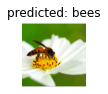

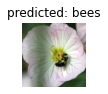

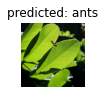

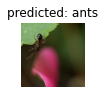

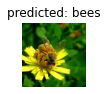

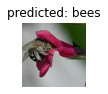

In [ ]:
visualize_model(model_conv)

plt.ioff()
plt.show()

#### 10.

In [ ]:
def get_features(image_data):
      
      # define resnet18 model
      model_conv_feat = torchvision.models.resnet18(pretrained=True)

      # disable gradient requirement of the params in the model
      for param in model_conv_feat.parameters():
            param.requires_grad = False

      # define the last layer to be Identity
      # this will ensure that the output is basically the input to the last layer
      # i.e., the features obtained
      model_conv_feat.fc = nn.Identity()
      model_conv_feat = model_conv_feat.to(device) 

      # define columns for the feature matrix dataframe     
      df_columns = [x for x in range(512)].copy()
      df_columns.append('label')

      # empty image_features list
      image_features = []

      # use DataLoader to get the model interpretable image data
      dataloader = {'data': torch.utils.data.DataLoader(image_data)}
      
      for inputs, labels in dataloader['data']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # get output of the model
            outputs = model_conv_feat(inputs)

            # .cpu() needs to be done in order to convert the output to a list
            outputs_cpu = outputs.cpu()

            # [0] indexing is done because outputs_cpu.tolist() and labels.tolist()
            # returns a list of list, we only need that inner list
            outputs_cpu = outputs_cpu.tolist()[0].copy()
            labels = labels.tolist()[0]
            outputs_cpu.append(labels)

            # append the output to image_features list
            image_features.append(outputs_cpu)

      # convert the image_features list to a pandas dataframe
      image_features = pd.DataFrame(image_features, columns = df_columns)
      
      # return the image_features dataframe
      return image_features

In [ ]:
# get training and validation features
features_train = get_features(image_datasets['train'])
features_val = get_features(image_datasets['val'])


# drop the label column in both training and validation datasets
# and define output y for both datasets as the same column

X_train = features_train.drop(['label'], axis=1)
y_train = features_train['label']

X_val = features_val.drop(['label'], axis=1)
y_val = features_val['label']

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#### Question 11.

We'll use the accuracy scoring metric to get the best parameters as we want both classifications to be correct. Accuracy is the best measure for the same.

In [ ]:
# define logistic regression classifier
logistic_reg = LogisticRegression(penalty = 'l2', max_iter = 10**6)

# define param_grid to perform exhaustive search over
l2_params = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

# perform grid search cv over the model
log_regcv = GridSearchCV(logistic_reg, param_grid = l2_params, scoring = 'accuracy')
log_regcv.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [ ]:
log_regcv_results = log_regcv.cv_results_

# maximum value of mean accuracy among the scores obtained
max_acc = max(log_regcv_results['mean_test_score'])
print('The maximum mean test accuracy is:', max_acc)

The maximum mean test accuracy is: 0.5982142857142858


In [ ]:
# indices with the max value of accuracy
max_acc_index = [i for i in range(len(log_regcv_results['mean_test_score'])) if log_regcv_results['mean_test_score'][i] == max_acc]

# prints the hyperparameter values for which we obtained highest accuracy
for i in max_acc_index:
  print(log_regcv_results['params'][i])

{'C': 10}


In [ ]:
# train logistic regression model with the obtained best hyperparameter
logistic_reg = LogisticRegression(penalty = 'l2', C = 10, max_iter = 10**6)
logistic_reg.fit(X_train, y_train)

# predict values on validation data and display classification report
y_pred = logistic_reg.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        70
           1       0.64      0.64      0.64        83

    accuracy                           0.61       153
   macro avg       0.60      0.60      0.60       153
weighted avg       0.61      0.61      0.61       153



In [ ]:
# define RBF Kernel SVM Classifier
rbf = SVC(kernel = 'rbf', max_iter = 10**6)

# define param_grid to perform exhaustive search over
rbf_params = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]}

# perform grid search cv over the model
rbfcv = GridSearchCV(rbf, param_grid = rbf_params, scoring = 'accuracy')
rbfcv.fit(X_train, y_train)

GridSearchCV(estimator=SVC(max_iter=1000000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [ ]:
rbfcv_results = rbfcv.cv_results_

# maximum value of accuracy among the scores obtained
max_acc = max(rbfcv_results['mean_test_score'])

print('The maximum mean test accuracy is:', max_acc)

# indices with the max value of accuracy
max_acc_index = [i for i in range(len(rbfcv_results['mean_test_score'])) if rbfcv_results['mean_test_score'][i] == max_acc]

# prints the hyperparameter values for which we obtained highest accuracy
for i in max_acc_index:
  print(rbfcv_results['params'][i])

The maximum mean test accuracy is: 0.5739795918367347
{'C': 1, 'gamma': 1}


In [ ]:
# train the model with the best hyperparameters obtained
rbf = SVC(kernel = 'rbf', C = 1, gamma = 1, max_iter = 10**6)
rbf.fit(X_train, y_train)

# predict output over validation data and display classification report
y_pred = rbf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61        70
           1       0.67      0.66      0.67        83

    accuracy                           0.64       153
   macro avg       0.64      0.64      0.64       153
weighted avg       0.64      0.64      0.64       153



In [ ]:
# define Random Forest Classifer
rndf = RandomForestClassifier()

# define param_grid to perform exhaustive search over
rndf_params = {'max_depth': [2, 4, 6, 8, 10, 12], 'max_features': [x for x in range(16, 513, 16)]}

# perform grid search cv over the model
rndfcv = GridSearchCV(rndf, param_grid = rndf_params, scoring = 'accuracy')
rndfcv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': [16, 32, 48, 64, 80, 96, 112, 128, 144,
                                          160, 176, 192, 208, 224, 240, 256,
                                          272, 288, 304, 320, 336, 352, 368,
                                          384, 400, 416, 432, 448, 464, 480, ...]},
             scoring='accuracy')

In [ ]:
rndfcv_results = rndfcv.cv_results_

# maximum value of mean accuracy among the scores obtained
max_acc = max(rndfcv_results['mean_test_score'])
print('The maximum mean test accuracy is:', max_acc)

# indices with the max value of accuracy
max_acc_index = [i for i in range(len(rndfcv_results['mean_test_score'])) if rndfcv_results['mean_test_score'][i] == max_acc]

# prints the hyperparameter values for which we obtained highest accuracy
for i in max_acc_index:
  print(rndfcv_results['params'][i])

The maximum mean test accuracy is: 0.5941326530612245
{'max_depth': 8, 'max_features': 64}


In [ ]:
# train the model with best hyperparameters obtained
rndf = RandomForestClassifier(max_depth = 8, max_features = 64)
rndf.fit(X_train, y_train)

# predict output over validation data and display classification report
y_pred = rndf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56        70
           1       0.63      0.63      0.63        83

    accuracy                           0.59       153
   macro avg       0.59      0.59      0.59       153
weighted avg       0.59      0.59      0.59       153



#### Question 12.

In Objective 2, it is clear that using the ResNet-18 model as a fixed feature extractor and performing either Logistic Regression, RBF Kernel SVM Classification, or Random Forest Classification over those features yields a poor performace. Whereas using the model as an initialization and performing SGD with a decaying learning rate, as was done in the execution of the model in Question 9., yields an extremely desirable performace of about 95% accuracy. Even in the $0^{th}$ Epoch, the validation accuracy for this Neural Network was very high. And it reached 95% accuracy in just 24 Epochs, within under 2 minutes while running on GPU. Thus, Transfer Learning is a far more desirable approach compared to implementing a similar 18-layer deep NN from scratch, as it would take an incredibly long time to converge to such high scores. The initialization especially gives a huge boost to the training.

Another important thing I learned is how GPU accelerated computation can be extremely fast compared to computation on CPU when using libraries that support GPU such as PyTorch and TensorFlow. It gives an extreme advantage over the training time needed. Also, sklearn does not support GPU computation, so we're out of luck over there.

It was interesting to run and compare different models, perform GridSearchCV over them to find the best hyperparameters, and then train and test the models. It's important to note that not all models perform the same, and it's generally wise to test out a few ML models with their best hyperparameters based on our need and decide which model to deploy finally in the real world. It's also important to choose your scoring metric wisely as to acount for the economic and social costs it might have in the real world.  
Another one of the major takeaways for me is how to use the sklearn library for Machine Learning.

EDA is an important step before any machine learning model can be implemented. We should remove the features that aren't varying much, and also those features which have a lot of missing values. We can impute data points for the missing values of a feature if they are less in number, about 10% ish. We should also make sure to remove the correlated features. Our feature elimination shouldn't be too harsh that we lose important features in the process, and shouldn't be so shallow that we retain unimportant ones. An important final step is to normalize the dataset we have, as most of the models in sklearn library assume we are providing a normalized dataset as an input. If it isn't so, we get bad performance, or the code might raise errors.

Apart from the sources I've mentioned in the code blocks themselves, the major sources of information and examples for me in solving this assignment are:  


1.   Sci-Kit Learn documentation
2.   PyTorch tutorials and documentation
3.   Pandas Documentation
4.   Matplotlib Documentation
5.   https://stackoverflow.com/questions/64229717/what-is-the-idea-behind-using-nn-identity-for-residual-learning (nn.Identity())
6.   https://www.pycodemates.com/2022/10/the-rbf-kernel-in-svm-complete-guide.html#:~:text=The%20RBF%20kernel%20works%20by,basic%20idea%20of%20Linear%20SVM. (RBF Kernel SVM)
7.   https://machinelearningmastery.com/calculate-feature-importance-with-python/ (Feature Importance)
8.   https://stackoverflow.com/questions/64394838/test-a-model-on-another-dataset (Testing model on a dataset)
9.   https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee (GridSearchCV)








